In [1]:
from midi_utils import get_notes, prepare_sequences, create_midi
import matplotlib.pyplot as plt

In [2]:
from model import MusicVAE
from torch import optim

In [3]:
import torch

device = "cuda:0" if torch.cuda.is_available() else "cpu"
device

'cuda:0'

# Load midi data and EDA

In [4]:
notes = get_notes("midi_songs")
notes

93


['6.9.11.1.2',
 '6.9.11.2',
 '11.2.4.7',
 '1.2.4.6.9',
 '6.9.11.1.2',
 '6.9.11.2',
 '11.2.4.7',
 '1.2.4.6.9',
 '6.9.11.1.2',
 '9.11.0.2.4',
 'E4',
 'G4',
 'E5',
 '11.2.4.6.7',
 'F#4',
 'E5',
 'B4',
 'G5',
 '9.11.0.2.4',
 'E4',
 'G4',
 'E5',
 '11.2.4.6.7',
 'F#4',
 'E5',
 'G5',
 '6.7.11.2',
 'B4',
 'G4',
 'D4',
 '4.5.9.0',
 'D5',
 'G5',
 'G4',
 '6.7.11.2',
 'B4',
 'G4',
 'D4',
 '4.5.9.0',
 'D5',
 'G5',
 'G4',
 '4.5.9.0',
 '9.0.2.5',
 '4.7.11',
 'G5',
 'C6',
 'B4',
 '10.1.5',
 'E-5',
 '5.8.0',
 '5.8.0',
 'F5',
 '10.1.5',
 'F5',
 'B-5',
 '10.1.5',
 'E-5',
 '5.8.0',
 '5.8.0',
 'F5',
 '10.1.5',
 'F5',
 'B-5',
 '4.7.9.0',
 '2.5.7.9',
 '9.11.2.4',
 '7.9.11.2.4',
 '4.7.9.11.0',
 'E4',
 'G4',
 '0.2.4.7',
 'C4',
 'A4',
 '6.9.11.2',
 '4.5.7.9.0',
 '9.0.2.5',
 '11.2.4.7',
 '4.5.9.0',
 '4.5.7.9.0',
 '9.0.2.5',
 '11.2.4.7',
 '4.5.9.0',
 '4.7.11',
 'E5',
 '4.7.9.0',
 '0.4.7',
 'E5',
 '7.9.2',
 'B5',
 'A5',
 'G5',
 '4.7.11',
 'E5',
 '4.7.9.0',
 '0.4.7',
 'E5',
 '7.9.2',
 'B5',
 'A5',
 'G5',
 '10.1.3.6

In [5]:
pitchnames = sorted(set(item for item in notes))
pitchnames

['0.1.3.5.8',
 '0.1.5.8',
 '0.2',
 '0.2.3.5.7',
 '0.2.3.7',
 '0.2.4',
 '0.2.4.7',
 '0.2.4.7.9',
 '0.2.5',
 '0.3',
 '0.3.5',
 '0.3.5.7',
 '0.3.5.7.8',
 '0.3.5.8',
 '0.3.7',
 '0.4',
 '0.4.7',
 '0.5',
 '1',
 '1.2',
 '1.2.4.6.9',
 '1.2.6',
 '1.2.6.9',
 '1.3.4.8',
 '1.3.5',
 '1.3.8',
 '1.4',
 '1.4.6.8.9',
 '1.4.6.9',
 '1.4.8',
 '1.5.8',
 '1.6',
 '1.7',
 '10',
 '10.0',
 '10.0.1.5',
 '10.0.2.5',
 '10.0.2.5.7',
 '10.0.3',
 '10.0.5',
 '10.1',
 '10.1.3.5.6',
 '10.1.3.6',
 '10.1.5',
 '10.11.3.6',
 '10.2',
 '10.2.5',
 '11',
 '11.0',
 '11.0.4.7',
 '11.1',
 '11.1.2.6',
 '11.1.3.6',
 '11.1.4.7',
 '11.2',
 '11.2.4',
 '11.2.4.6.7',
 '11.2.4.7',
 '11.2.6',
 '11.3',
 '11.3.5',
 '11.3.6',
 '11.4',
 '2',
 '2.3.5.7.10',
 '2.3.7',
 '2.3.7.10',
 '2.4',
 '2.4.5.9',
 '2.4.6',
 '2.4.6.7',
 '2.4.7.10',
 '2.4.7.9',
 '2.5',
 '2.5.7',
 '2.5.7.10',
 '2.5.7.9',
 '2.5.7.9.10',
 '2.5.9',
 '2.6',
 '2.6.7',
 '2.6.9',
 '2.7',
 '2.8',
 '3',
 '3.4',
 '3.4.6.8',
 '3.4.8.10.11',
 '3.4.8.11',
 '3.5',
 '3.5.10',
 '3.5.7',
 '3.5.

In [6]:
len(pitchnames)

254

In [7]:
n_vocab = len(set(notes))
n_vocab

254

In [8]:
network_input, idx_to_note = prepare_sequences(notes, pitchnames, n_vocab)

In [9]:
network_input.shape

(1868, 32, 256)

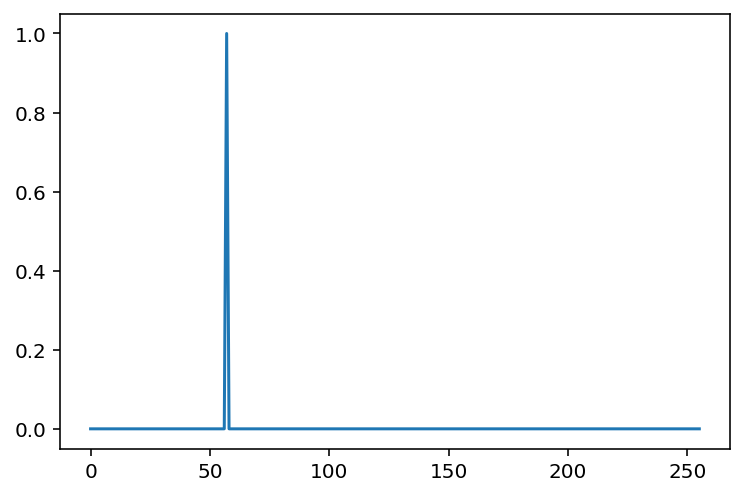

In [10]:
plt.plot(network_input[1, 1, :])

In [11]:
network_input = torch.Tensor(network_input)

# Training

In [12]:
model = MusicVAE().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=0.9999)

total_loss = []
epochs = 100
batch_size = 256
step_size = len(network_input) // batch_size

for epoch in range(epochs):
    losses = []
    optimizer.zero_grad()
    loss = model.forward(
        network_input.to(device), step_size=step_size, verbose=1
    )
    losses.append(loss)
    loss.backward(retain_graph=True)
    optimizer.step()

    avg_loss = torch.mean(torch.Tensor(losses))
    print(f"Epoch: {epoch}, Loss: {avg_loss}")
    total_loss.append(avg_loss)
    # if avg_loss > torch.mean(torch.Tensor(total_loss[-2:])):
    #     break

c:\Users\leok8\Downloads\Works\Learning-Music-Variational-AutoEncoder\model.py:147: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.softmax(out)


Reconstruction loss: 55702.2890625, KL divergence loss: 661.3140258789062
Epoch: 0, Loss: 55702.2890625
Reconstruction loss: 55699.5546875, KL divergence loss: 582.6030883789062
Epoch: 1, Loss: 55699.5546875
Reconstruction loss: 55697.0546875, KL divergence loss: 511.478515625
Epoch: 2, Loss: 55697.0546875
Reconstruction loss: 55693.609375, KL divergence loss: 448.26995849609375
Epoch: 3, Loss: 55693.609375
Reconstruction loss: 55686.953125, KL divergence loss: 393.056884765625
Epoch: 4, Loss: 55686.953125
Reconstruction loss: 55672.4296875, KL divergence loss: 345.9541015625
Epoch: 5, Loss: 55672.4296875
Reconstruction loss: 55639.63671875, KL divergence loss: 308.8737487792969
Epoch: 6, Loss: 55639.63671875
Reconstruction loss: 55596.95703125, KL divergence loss: 278.95513916015625
Epoch: 7, Loss: 55596.95703125
Reconstruction loss: 55559.8203125, KL divergence loss: 245.13406372070312
Epoch: 8, Loss: 55559.8203125
Reconstruction loss: 55517.13671875, KL divergence loss: 213.26284790

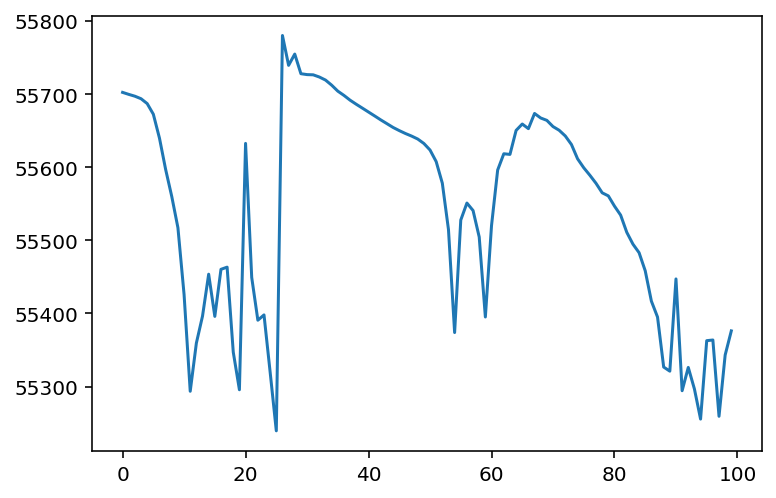

In [13]:
plt.plot(total_loss)

# Sampling

In [14]:
model.initialize_sampler()
sampler = model.sample()

In [15]:
sample = []
for _ in range(512):
    try:
        sample += [idx_to_note[torch.argmax(sampler.sample()).item()]]
    except KeyError:
        print("Out of dictionary.")
        

Out of dictionary.
Out of dictionary.
Out of dictionary.
Out of dictionary.
Out of dictionary.
Out of dictionary.


In [16]:
print(sample)

['1.2', '10.11.3.6', '8.9.11.1.4', '7.10.2', '6.11', 'F5', 'F#2', '6.9.10', '2.5.7.10', '10.0.1.5', '4.8.9.11', '5.9.0', '3.5.10', 'F#5', '6.9.1', '9.0.2.4.5', '4.5.7.9.0', '9.11', 'F6', '2.4.7.9', '10.1.5', '3.6.8.10.11', '3.5.7', '1.7', '2.5.7.10', 'E6', '4.9', '5', 'E-4', 'F2', '6', '2.4.7.9', '2.4.6', '0.5', 'C#5', '0.2', '1.2.4.6.9', '3.6.10', '7', '2.3.5.7.10', 'A4', '4.5.9.0', '2.3.5.7.10', '0.2.4.7.9', '1.2.6', 'B5', '10.1.3.6', '0.3.7', '7.11.1', '6.9.11.1.2', '11', '1.2.4.6.9', '3.6.10', 'G1', 'B5', '1.3.5', 'F2', 'E4', '10.1', '3.7', 'E5', 'F#2', '2.3.7.10', '0.1.3.5.8', '0.3.5', '6.8.10.1.3', '9.11.0.2.4', 'C#3', 'E4', 'F#2', 'F2', '4.9', '10.1.3.6', '10.1.3.6', '3.6', '3.4.8.11', '1.2.4.6.9', '3.6.8.10.11', '5.8.10.0.1', '0.4.7', '3.4.6.8', 'F6', '2.5.7.9.10', '2.5.7', '7.9.2', '6', '10.0.3', '4', '5.7', 'C#3', 'C4', 'A4', '3.5.7.11', '0.2.3.5.7', '10.1', 'B1', '5.11', '4.7.10.0', '3.6.8.11', 'E-4', 'E-2', '2.5.7', 'B-1', '10.0.2.5', 'B2', '5.7.9.0', '9.10.2.5', '4', '2.4.

In [17]:
output_path = "./sample.mid"

In [18]:
create_midi(sample, output_path=output_path, offset_step=1.0)